# This jupyter notebook is prepared by “Daniel Cisneros”.

---
## **1. Load Data and perform basic EDA**
---

### **I.** import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


### **II.** import the data to a dataframe and show the count of rows and columns (1 pt)

In [3]:
data = pd.read_csv("hrdata2.csv")
print("Number of rows: ", len(data))
print("Number of columns: ",len(data.columns), "\n")
print("\nTotal matrix: ", data.shape)

Number of rows:  8955
Number of columns:  15 


Total matrix:  (8955, 15)


### **III.** Show the top 5 and last 5 rows (1 pt)


In [4]:
data.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [5]:
data.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


### **IV.** Show how many columns have null values

In [6]:
nulls = data.isnull().sum().to_frame("nulls") 
nulls

,nulls
Unnamed: 0,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0


### **V.**  Plot the count of target and discuss its imbalances and probable issues and solutions

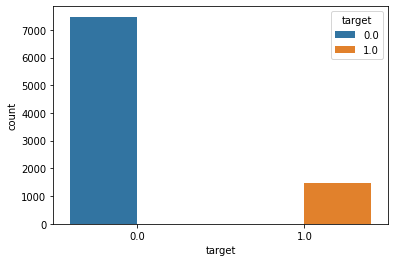

In [7]:
target_count = data["target"].value_counts()

sns.countplot(x = "target", data = data, hue = "target")

In [8]:
#sns.pairplot(data)

##### **Discussion:** missing. 

---
## **2. Feature Selection and Pre-processing**
---

### **I.** Preprocessing City:

#### **I.** Plot number of records per city so that the highest city counts are shown in descending order

In [9]:
num_record_cities = data["city"].value_counts()
num_record_cities = num_record_cities.to_frame("city")
num_record_cities.sort_values("city", inplace = True, ascending = False)

num_record_cities

,city
city_103,2426
city_21,1111
city_16,836
city_114,648
city_160,401
...,...
city_127,1
city_107,1
city_62,1
city_109,1


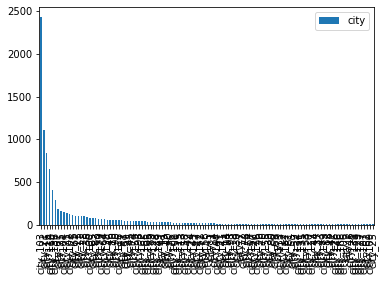

In [10]:
num_record_cities.plot.bar()

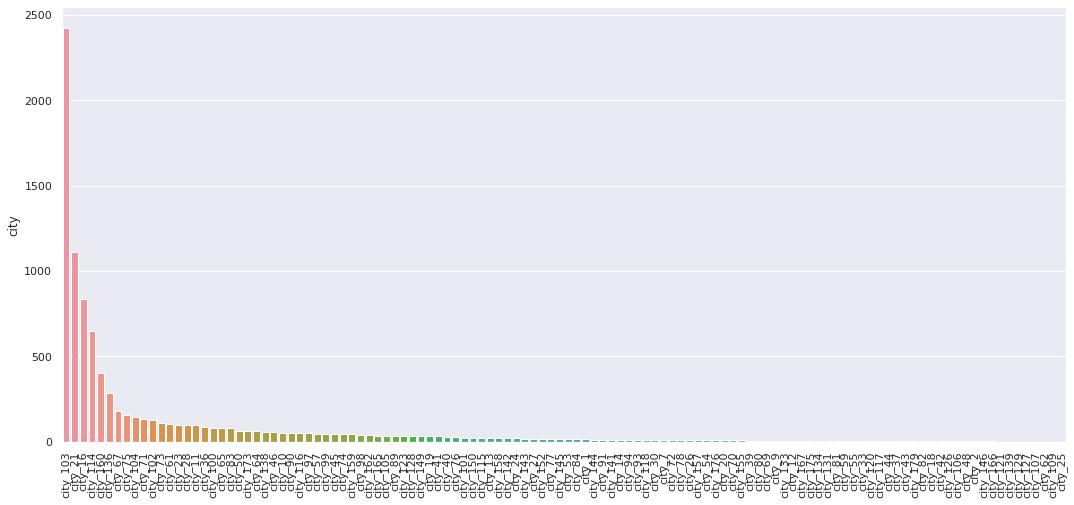

In [11]:
sns.set(rc = {'figure.figsize':(18,8)})
num_record_cities = data["city"].value_counts()
sns.barplot(x = num_record_cities.index, y = num_record_cities, data = data)
plt.xticks(rotation = 90)
plt.show()

#### **II.** How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (The plot you have generated in 2.i.i should help you to identify those cities)

##### **Discussion:** The top four cities are: 
city_103 = 2426 , city_21 = 1111 , city_16 = 836, and city_114 = 648

The total number of rows that these cities occupy = 5021 rows

The remaining rows can can be calculated with  (total # of rows) - (The total number of rows that these cities occupy) = 5021 - 8955 

Therefore, the remaining rows for the cities is equal to (3934)

#### **III.** Replace the city name with city_others if the city name is not within the top 4 city names. (This link might help you: https://stackoverflow.com/questions/31128477/how-to-set-values-based-on-a-list-in-pandas-python (Links to an external site.) (Also, converting the list to a set and then doing a set difference might help you as well)

In [12]:
city_list = ["city_160", "city_136", "city_67", "city_75", "city_104", "city_71", "city_102", "city_73", 
             "city_61", "city_23", "city_28", "city_11", "city_36", "city_100", "city_65", "city_83", "city_50",
             "city_173", "city_64", "city_138", "city_46", "city_10", "city_90", "city_116", "city_97", "city_57",
             "city_99", "city_45", "city_74", "city_159", "city_98", "city_162", "city_165", "city_105", "city_89",
             "city_123", "city_128", "city_149", "city_19", "city_41", "city_40", "city_76", "city_101", "city_150",
             "city_115", "city_13", "city_158", "city_142", "city_24", "city_143", "city_27", "city_152", "city_77",
             "city_145", "city_53", "city_84", "city_1", "city_144", "city_91", "city_141", "city_14", "city_94", "city_93",
             "city_118", "city_30", "city_7", "city_72", "city_78", "city_26", "city_157", "city_54", "city_176", "city_20",
             "city_70", "city_155", "city_39", "city_80", "city_69", "city_9", "city_133", "city_12", "city_167", "city_175",
             "city_134", "city_131", "city_81", "city_59", "city_55", "city_33", "city_120", "city_117", "city_44", "city_37",
             "city_43", "city_179", "city_82", "city_18", "city_42", "city_126", "city_106", "city_48", "city_2", "city_146",
             "city_166", "city_121", "city_139", "city_129", "city_127", "city_107", "city_62", "city_109", "city_25",]
             
data.loc[data["city"].isin(city_list), "city"] = "city_others"
data

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_others,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0


#### **IV.** Show some sample data that the records have changed appropriately


In [13]:
num_record_other_cities = data["city"].value_counts()
num_record_other_cities = num_record_other_cities.to_frame("city")
num_record_other_cities.sort_values("city", inplace = True, ascending = False)

num_record_other_cities

,city
city_others,3934
city_103,2426
city_21,1111
city_16,836
city_114,648


### **II.** Education Level:

#### **I.** Show the unique values of education level.

In [14]:
data["education_level"].unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

#### **II.** Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 

In [15]:
list_grad = ["Graduate"]
list_mas = ["Masters"]
list_ph = ["Phd"]
data.loc[data["education_level"].isin(list_grad), "education_level"] = 0
data.loc[data["education_level"].isin(list_mas), "education_level"] = 1
data.loc[data["education_level"].isin(list_ph), "education_level"] = 2

#### **III.** Show some sample data that the records have changed appropriately

In [16]:
data

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_others,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,10/49,Funded Startup,1,25,0.0


### **III.** company_size column:

#### **I.** Show the unique values of the company_size column

In [17]:
data["company_size"].unique()

array(['50-99', '<10', '5000-9999', '1000-4999', '10/49', '100-500',
       '10000+', '500-999'], dtype=object)

#### **II.** Change the values of the company_size column from 0 to 7 where 0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. 

In [18]:
comp_zero = ["<10"]
comp_one = ["10/49"]
comp_two = ["50-99"]
comp_three = ["100-500"]
comp_four = ["500-999"]
comp_five = ["1000-4999"]
comp_six = ["5000-9999"]
comp_plus = ["10000+"]
data.loc[data["company_size"].isin(comp_zero), "company_size"] = 0
data.loc[data["company_size"].isin(comp_one), "company_size"] = 1
data.loc[data["company_size"].isin(comp_two), "company_size"] = 2
data.loc[data["company_size"].isin(comp_three), "company_size"] = 3 
data.loc[data["company_size"].isin(comp_four), "company_size"] = 4
data.loc[data["company_size"].isin(comp_five), "company_size"] = 5
data.loc[data["company_size"].isin(comp_six), "company_size"] = 6
data.loc[data["company_size"].isin(comp_plus), "company_size"] = 7 

#### **III.** Show the updated unique values

In [19]:
data["company_size"].unique()

array([2, 0, 6, 5, 1, 3, 7, 4], dtype=object)

### **IV.** Last_new_job:

#### **I.** Show the unique values of the last_new_job column

In [20]:
data["last_new_job"].unique()

array(['>4', '4', '1', '3', '2', 'never'], dtype=object)

#### **II.** Convert the values of this column to never->0, 1->1,....>4 -->5


In [21]:
data.loc[data["last_new_job"].isin(["never"]), "last_new_job"] = 0
data.loc[data["last_new_job"].isin([1]), "last_new_job"] = 1
data.loc[data["last_new_job"].isin([2]), "last_new_job"] = 2
data.loc[data["last_new_job"].isin([3]), "last_new_job"] = 3
data.loc[data["last_new_job"].isin([4]), "last_new_job"] = 4
data.loc[data["last_new_job"].isin([">4"]), "last_new_job"] = 5

#### **III.** Show the updated values

In [22]:
data["last_new_job"].unique()

array([5, '4', '1', '3', '2', 0], dtype=object)

### **V.** Other columns:

#### **I.** Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column

In [23]:
data["company_type"].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO', 'Other'], dtype=object)

In [24]:
data["major_discipline"].unique()

array(['STEM', 'Humanities', 'Business Degree', 'Other', 'No Major',
       'Arts'], dtype=object)

In [25]:
data["enrolled_university"].unique()

array(['no_enrollment', 'Part time course', 'Full time course'],
      dtype=object)

In [26]:
data["relevent_experience"].unique()

array(['No relevent experience', 'Has relevent experience'], dtype=object)

In [27]:
data["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
data["city"].unique()

array(['city_others', 'city_103', 'city_114', 'city_21', 'city_16'],
      dtype=object)

#### **II.** s one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:

##### **I.** company_tye

In [29]:
dummy_comp_size = pd.get_dummies(data["company_type"])
data = pd.merge(
    left=data,
    right= dummy_comp_size,
    left_index=True,
    right_index=True,)
print(dummy_comp_size)

      Early Stage Startup  Funded Startup  NGO  Other  Public Sector  Pvt Ltd
0                       0               0    0      0              0        1
1                       0               1    0      0              0        0
2                       0               0    0      0              0        1
3                       0               0    0      0              0        1
4                       0               0    0      0              0        1
...                   ...             ...  ...    ...            ...      ...
8950                    0               0    0      0              0        1
8951                    0               0    0      0              0        1
8952                    0               0    0      0              1        0
8953                    0               1    0      0              0        0
8954                    0               0    0      0              0        1

[8955 rows x 6 columns]


##### **II.** major_descipline

In [30]:
dummy_descipline = pd.get_dummies(data["major_discipline"])
data = pd.merge(
    left=data,
    right=dummy_descipline,
    left_index=True,
    right_index=True,)
print(dummy_descipline)

      Arts  Business Degree  Humanities  No Major  Other  STEM
0        0                0           0         0      0     1
1        0                0           0         0      0     1
2        0                0           0         0      0     1
3        0                0           0         0      0     1
4        0                0           0         0      0     1
...    ...              ...         ...       ...    ...   ...
8950     0                0           0         0      0     1
8951     0                0           0         0      0     1
8952     0                0           0         0      0     1
8953     0                0           1         0      0     0
8954     0                0           0         0      0     1

[8955 rows x 6 columns]


##### **III.** enrolled_university

In [31]:
dummy_enrolled = pd.get_dummies(data["enrolled_university"])
data = pd.merge(
    left=data,
    right= dummy_enrolled,
    left_index=True,
    right_index=True,)
print(dummy_enrolled)

      Full time course  Part time course  no_enrollment
0                    0                 0              1
1                    0                 0              1
2                    0                 0              1
3                    0                 0              1
4                    0                 0              1
...                ...               ...            ...
8950                 1                 0              0
8951                 0                 0              1
8952                 0                 0              1
8953                 0                 0              1
8954                 0                 0              1

[8955 rows x 3 columns]


##### **IV.** relevant_eperience

In [32]:
dummy_exp = pd.get_dummies(data["relevent_experience"])
data = pd.merge(
    left=data,
    right=dummy_exp,
    left_index=True,
    right_index=True,)
print(dummy_exp)

      Has relevent experience  No relevent experience
0                           0                       1
1                           1                       0
2                           1                       0
3                           1                       0
4                           1                       0
...                       ...                     ...
8950                        0                       1
8951                        1                       0
8952                        1                       0
8953                        1                       0
8954                        1                       0

[8955 rows x 2 columns]


##### **V.** gender

In [33]:
dummy_gender = pd.get_dummies(data["gender"])
data = pd.merge(
    left=data,
    right=dummy_gender,
    left_index=True,
    right_index=True,)
print(dummy_gender)

      Female  Male  Other
0          0     1      0
1          0     1      0
2          0     1      0
3          0     1      0
4          0     1      0
...      ...   ...    ...
8950       0     1      0
8951       0     1      0
8952       1     0      0
8953       1     0      0
8954       0     1      0

[8955 rows x 3 columns]


##### **VI.** updated city column

In [34]:
dummy_city = pd.get_dummies(data["city"])
data = pd.merge(
    left=data,
    right=dummy_city,
    left_index=True,
    right_index=True,)
print(dummy_city)

      city_103  city_114  city_16  city_21  city_others
0            0         0        0        0            1
1            0         0        0        0            1
2            0         0        0        0            1
3            1         0        0        0            0
4            1         0        0        0            0
...        ...       ...      ...      ...          ...
8950         0         0        0        1            0
8951         1         0        0        0            0
8952         0         0        0        0            1
8953         1         0        0        0            0
8954         1         0        0        0            0

[8955 rows x 5 columns]


#### **III.** Show the top 5 and last 5 rows to show that the table has changed

In [35]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other_x,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other_y,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,city_others
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


In [36]:
data.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other_x,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other_y,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,city_others
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,3,Pvt Ltd,1,52,1.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,2,Pvt Ltd,1,36,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
8952,19150,32313,city_others,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,3,Public Sector,3,23,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,1,Funded Startup,1,25,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,21.0,2,Pvt Ltd,4,44,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


#### **IV.** Also, show the shape of the table

In [37]:
print("Number of rows: ", len(data))
print("Number of columns: ",len(data.columns), "\n") 
print("\nTotal matrix: ", data.shape)

Number of rows:  8955
Number of columns:  40 


Total matrix:  (8955, 40)


### **VI.** Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)

In [38]:
data = data.drop("enrollee_id", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### **VII.** Feature Scaling:

#### **I.** Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns

In [39]:
from sklearn.preprocessing import MinMaxScaler

min_scaler = MinMaxScaler()

data[['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other_x', 'Public Sector', 'Pvt Ltd', 'Arts',
       'Business Degree', 'Humanities', 'No Major', 'Other_y', 'STEM',
       'Full time course', 'Part time course', 'no_enrollment',
       'Has relevent experience', 'No relevent experience', 'Female', 'Male',
       'Other', 'city_103', 'city_114', 'city_16', 'city_21', 'city_others']] = min_scaler.fit_transform(data[['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other_x', 'Public Sector', 'Pvt Ltd', 'Arts',
       'Business Degree', 'Humanities', 'No Major', 'Other_y', 'STEM',
       'Full time course', 'Part time course', 'no_enrollment',
       'Has relevent experience', 'No relevent experience', 'Female', 'Male',
       'Other', 'city_103', 'city_114', 'city_16', 'city_21', 'city_others']])

#### **II.** Show sample records that show some the scaled records

In [40]:
data

,Unnamed: 0,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other_x,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other_y,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,city_others
0,1,city_others,0.654691,Male,No relevent experience,no_enrollment,0.0,STEM,0.714286,0.285714,Pvt Ltd,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,city_others,0.636727,Male,Has relevent experience,no_enrollment,0.5,STEM,1.000000,0.285714,Funded Startup,0.8,0.020896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,city_others,0.626747,Male,Has relevent experience,no_enrollment,0.0,STEM,0.619048,0.000000,Pvt Ltd,1.0,0.050746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.333333,0.285714,Pvt Ltd,0.2,0.134328,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.238095,0.857143,Pvt Ltd,0.2,0.319403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,city_21,0.351297,Male,No relevent experience,Full time course,0.0,STEM,0.047619,0.428571,Pvt Ltd,0.2,0.152239,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8951,19149,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.5,STEM,0.428571,0.285714,Pvt Ltd,0.2,0.104478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8952,19150,city_others,0.942116,Female,Has relevent experience,no_enrollment,0.0,STEM,0.476190,0.428571,Public Sector,0.6,0.065672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8953,19152,city_103,0.942116,Female,Has relevent experience,no_enrollment,0.0,Humanities,0.333333,0.142857,Funded Startup,0.2,0.071642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **VIII.** Move the target column to the last column of the data frame and show that it has changed

In [41]:
target_col = data.pop("target")


In [42]:
data.insert(38, 'target', target_col)
data

,Unnamed: 0,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Early Stage Startup,Funded Startup,NGO,Other_x,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other_y,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,city_others,target
0,1,city_others,0.654691,Male,No relevent experience,no_enrollment,0.0,STEM,0.714286,0.285714,Pvt Ltd,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,city_others,0.636727,Male,Has relevent experience,no_enrollment,0.5,STEM,1.000000,0.285714,Funded Startup,0.8,0.020896,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,city_others,0.626747,Male,Has relevent experience,no_enrollment,0.0,STEM,0.619048,0.000000,Pvt Ltd,1.0,0.050746,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,8,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.333333,0.285714,Pvt Ltd,0.2,0.134328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,11,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.238095,0.857143,Pvt Ltd,0.2,0.319403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,city_21,0.351297,Male,No relevent experience,Full time course,0.0,STEM,0.047619,0.428571,Pvt Ltd,0.2,0.152239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8951,19149,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.5,STEM,0.428571,0.285714,Pvt Ltd,0.2,0.104478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8952,19150,city_others,0.942116,Female,Has relevent experience,no_enrollment,0.0,STEM,0.476190,0.428571,Public Sector,0.6,0.065672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8953,19152,city_103,0.942116,Female,Has relevent experience,no_enrollment,0.0,Humanities,0.333333,0.142857,Funded Startup,0.2,0.071642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **3. X/Y and Training/Test Split with stratified sampling and SMOTE**

### **I.** Copy all the features into X and the target to Y

In [43]:
X = data[['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other_x', 'Public Sector', 'Pvt Ltd', 'Arts',
       'Business Degree', 'Humanities', 'No Major', 'Other_y', 'STEM',
       'Full time course', 'Part time course', 'no_enrollment',
       'Has relevent experience', 'No relevent experience', 'Female', 'Male',
       'Other', 'city_103', 'city_114', 'city_16', 'city_21', 'city_others']]

Y = data[["target"]]

In [44]:
numerical_features = data.select_dtypes(include = [np.number])
numerical_features.columns

Index(['Unnamed: 0', 'city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other_x', 'Public Sector', 'Pvt Ltd', 'Arts',
       'Business Degree', 'Humanities', 'No Major', 'Other_y', 'STEM',
       'Full time course', 'Part time course', 'no_enrollment',
       'Has relevent experience', 'No relevent experience', 'Female', 'Male',
       'Other', 'city_103', 'city_114', 'city_16', 'city_21', 'city_others',
       'target'],
      dtype='object')

### **II.** Show the ratio of 1 and 0 in Y


In [45]:
Y.value_counts()

target
0.0       7472
1.0       1483
dtype: int64

### **III.** Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.  

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .30, random_state = 0, stratify = Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6268, 31) (2687, 31) (6268, 1) (2687, 1)


### **IV.** Show the ratio of 1 and 0 in y_train and then y_test

In [47]:
y_train.value_counts()

target
0.0       5230
1.0       1038
dtype: int64

In [48]:
y_test.value_counts()

target
0.0       2242
1.0        445
dtype: int64

### **V.** Rebalance:

#### **I.** Use imblearn's SMOTE to balance the x_train

In [49]:
from imblearn.over_sampling import SMOTE 

X_train_b ,y_train_b= SMOTE().fit_resample(X_train, y_train)

### **VI.** Show the ratio of 0 and 1 in Y_train after rebalancing.

In [50]:
y_train_b.value_counts()

target
0.0       5230
1.0       5230
dtype: int64

## **4. PCA and Logistic Regression**

### **I.** As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of it, create pipeline to find how many dimensions give you the best logistic regression model. You can follow this link: https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/ (Links to an external site.) (consider using the code right before the plot). But you need to use our balanced training set in this experiment. Also, number of features should be based on how many maximum features do we have so far. This question should produce a plot and based on that you need to decide how many features would you like to use.

>1 0.692 (0.012)
>2 0.699 (0.011)
>3 0.699 (0.010)
>4 0.700 (0.010)
>5 0.714 (0.012)
>6 0.715 (0.012)
>7 0.720 (0.013)
>8 0.732 (0.013)
>9 0.732 (0.013)
>10 0.736 (0.010)
>11 0.737 (0.010)
>12 0.737 (0.010)
>13 0.737 (0.011)
>14 0.736 (0.011)
>15 0.738 (0.012)
>16 0.737 (0.012)
>17 0.737 (0.012)
>18 0.737 (0.012)
>19 0.737 (0.013)
>20 0.740 (0.012)
>21 0.740 (0.011)
>22 0.740 (0.012)
>23 0.740 (0.012)
>24 0.741 (0.012)
>25 0.740 (0.012)
>26 0.740 (0.012)
>27 0.740 (0.012)
>28 0.740 (0.012)
>29 0.740 (0.012)
>30 0.740 (0.012)
>31 0.740 (0.012)


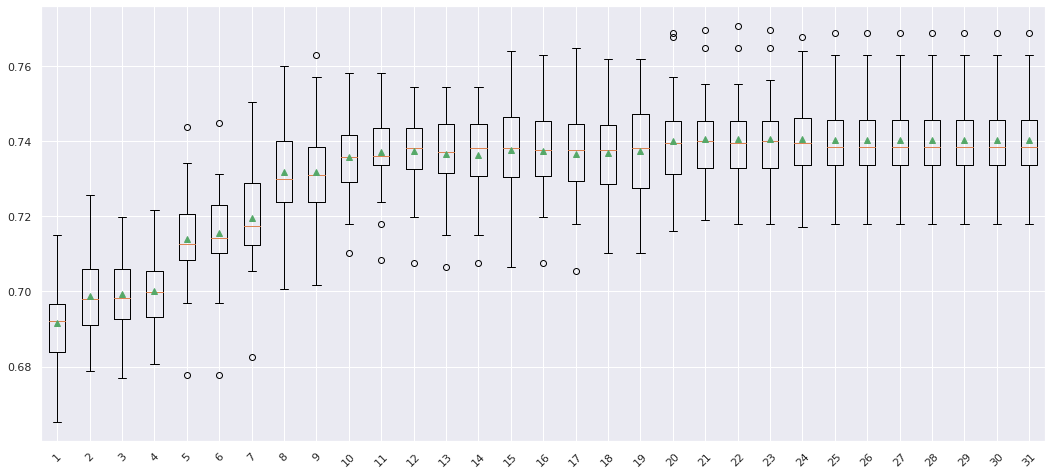

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict

# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(X_train_b, y_train_b)
# apply transform to dataset
pca.transform(X_train_b)

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train_b, y_train_b):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_b, y_train_b, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train_b, y_train_b)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()


### **II.** Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy (the code right after the plot can give you an idea about it.). Use sklearn.metrics import accuracy_score for accuracy

In [52]:
from sklearn.metrics import accuracy_score
# define the model
steps = [('pca', PCA(n_components=25)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

model.fit(X_train_b, y_train_b.values.ravel())
y_pp = model.predict(X_test)



# evaluate a given model using cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy from function: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))
print("Using accuracy_score: ",accuracy_score(y_test, y_pp))

Accuracy from function: 0.857 (0.016)
Using accuracy_score:  0.8016375139560848


### **IV.** Show the confusion matrix and interpret the numbers in the confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pp)
print(cm)

[[1892  350]
 [ 183  262]]


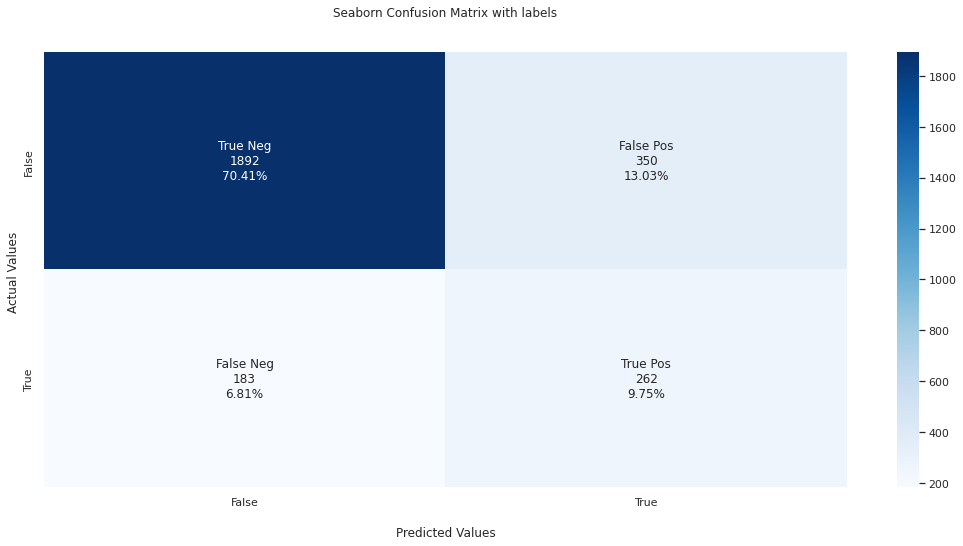

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

##### **Interpretation:** 
The confusion matrix returns and array that contain True Negatives, False Positive, False Negative, True Positive

[[TN FP]
 [FN TP]]

### **IV.** Show precision, recall, and f1 score ((the google colab link in the classification module should help with it)). Note that all of these scores should be calculated based on the test set and predicted result for the test set

In [55]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pp)

0.42810457516339867

In [56]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pp)

0.5887640449438202

In [57]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pp)

0.4957426679280984

In [58]:
from sklearn.metrics import classification_report
print(cm)
print(classification_report(y_test, y_pp))

[[1892  350]
 [ 183  262]]
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88      2242
         1.0       0.43      0.59      0.50       445

    accuracy                           0.80      2687
   macro avg       0.67      0.72      0.69      2687
weighted avg       0.83      0.80      0.81      2687



### **V.** Plot ROC curve and find AUC (the same google colab link should help you)

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(model, X_test, y_test.values.ravel(), cv=3,
 method="decision_function")

fpr, tpr, thresholds = roc_curve(y_test, y_pp)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_scores)

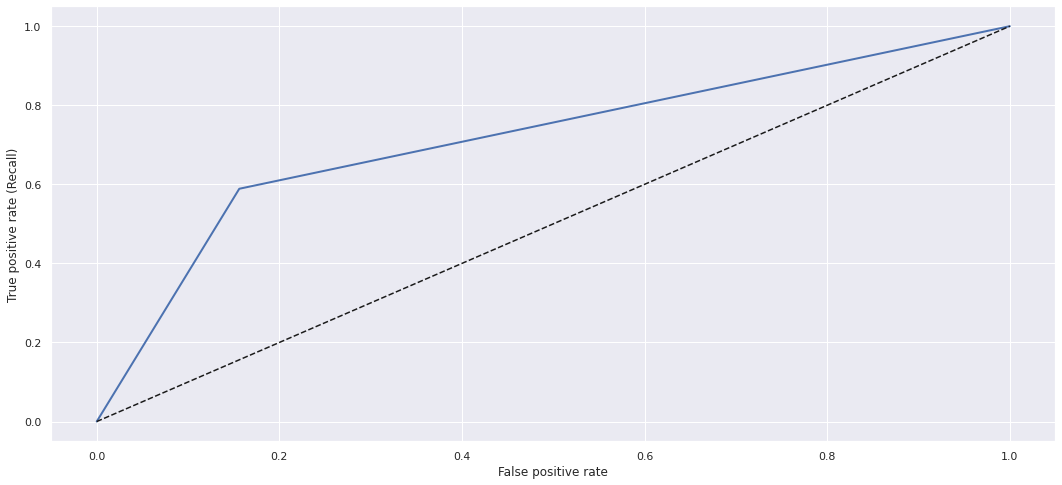

AUC: 0.7163267147109823


In [60]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print("AUC:", roc_auc_score(y_test, y_pp))

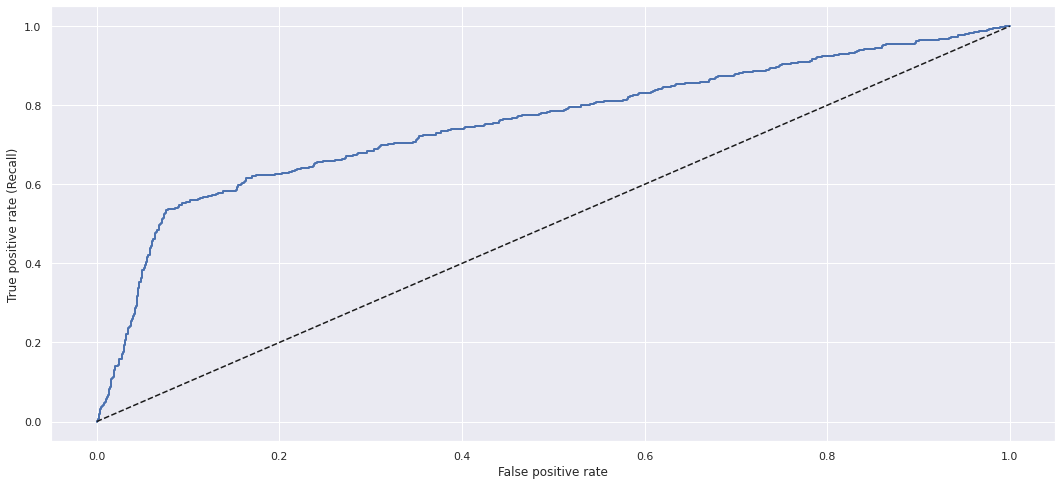

AUC: 0.7543134641020758


In [61]:
plot_roc_curve(fpr2, tpr2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print("AUC:", roc_auc_score(y_test, y_scores))

### **VI.** Plot precision-recall curve for different thresholds and discuss the plot

In [62]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

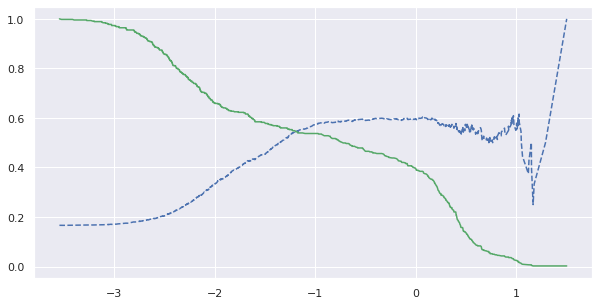

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 #[...] # highlight the threshold, add the legend, axis label and grid

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

##### **Discussion:** Here we can see the the precision looks bumpy going up and down due to different threshold. As the threshold increases we can see that the recall goes down

## **5. Softmaxt regression:**

### **1.** How softmax regression is related to logistic regression? What library can you use for softmax regression?


##### **Discussion:** Sofmax Regression also known as "Multinomial Logistic" or just "Multi-class Logistic Regression" is a generalization of logisctic regression that we can use for multi-class classification. 

Libraries that can be used are sklearn which contains the LogisticRegression() where you can modify the parameters inside to make it a multiclass

## **6. KNN**

### **1.** Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train.values.ravel())

y_knn = knn.predict(X_test)

print(confusion_matrix(y_test, y_knn))
print(classification_report(y_test, y_knn))

[[2153   89]
 [ 307  138]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2242
         1.0       0.61      0.31      0.41       445

    accuracy                           0.85      2687
   macro avg       0.74      0.64      0.66      2687
weighted avg       0.83      0.85      0.83      2687



### **2.** Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report


In [65]:
knn_b = KNeighborsClassifier(n_neighbors=10)
knn_b.fit(X_train_b, y_train_b.values.ravel())

y_knn_b = knn_b.predict(X_test)

print(confusion_matrix(y_test, y_knn_b))
print(classification_report(y_test, y_knn_b))

[[1749  493]
 [ 182  263]]
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2242
         1.0       0.35      0.59      0.44       445

    accuracy                           0.75      2687
   macro avg       0.63      0.69      0.64      2687
weighted avg       0.81      0.75      0.77      2687



### **3.** Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at Link to sklearn (Links to an external site.). Also some helpful links and codes: https://github.com/oguzhankir/Hyperparameter_Tuning/tree/main/Knn_tuning (Links to an external site.)  and
https://www.youtube.com/watch?v=TvB_3jVIHhg

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

knn_params = {
    "n_neighbors": range(1, 20),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

knn_s = KNeighborsClassifier()

# Grid Search
cv_s = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)


gs = GridSearchCV(
    estimator = knn_s,
    param_grid= knn_params,
    scoring=scoring,
    refit = "AUC",
    cv = cv_s,
    verbose = 4
)

In [67]:
gs_results = gs.fit(X_train_b, y_train_b.values.ravel())

Fitting 30 folds for each of 114 candidates, totalling 3420 fits
[CV 1/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.871) Accuracy: (test=0.871) total time=   0.2s
[CV 2/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.878) Accuracy: (test=0.878) total time=   0.2s
[CV 3/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.877) Accuracy: (test=0.877) total time=   0.2s
[CV 4/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.884) Accuracy: (test=0.884) total time=   0.2s
[CV 5/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.877) Accuracy: (test=0.877) total time=   0.2s
[CV 6/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.874) Accuracy: (test=0.874) total time=   0.2s
[CV 7/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC: (test=0.887) Accuracy: (test=0.887) total time=   0.2s
[CV 8/30] END metric=euclidean, n_neighbors=1, weights=uniform; AUC

### **4.** The above grid search process can take a couple of minutes. After completing the process, print the best_params_

In [68]:
print(gs.best_params_)
print(gs_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


### **5.** Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC.

In [69]:
final_model = knn_s.set_params(**gs_results.best_params_)
final_model.fit(X_train_b, y_train_b.values.ravel())
y_mod_pred = final_model.predict(X_test)

In [70]:
print(confusion_matrix(y_test, y_mod_pred))
print("AUC:", roc_auc_score(y_test,y_mod_pred))
print(classification_report(y_test, y_mod_pred))

[[1814  428]
 [ 209  236]]
AUC: 0.6697180486924795
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      2242
         1.0       0.36      0.53      0.43       445

    accuracy                           0.76      2687
   macro avg       0.63      0.67      0.64      2687
weighted avg       0.81      0.76      0.78      2687



### **6.** Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.

In [71]:
steps = [('pca', PCA(n_components = 20)), ('m', KNeighborsClassifier())]
model = Pipeline(steps = steps)

model.fit(X_train_b, y_train_b.values.ravel())

y_k_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_k_pred))
print("AUC:", roc_auc_score(y_test,y_k_pred))
print(classification_report(y_test, y_k_pred))

[[1701  541]
 [ 175  270]]
AUC: 0.6827195822349629
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      2242
         1.0       0.33      0.61      0.43       445

    accuracy                           0.73      2687
   macro avg       0.62      0.68      0.63      2687
weighted avg       0.81      0.73      0.76      2687



### **7.** A short discussion on the 4 models and their differences.

##### **Discussion:**.  Comparing the 4 models, I would say that KNN using Grid Search perfoms slightly better on precision, recall, AUC, and f1-score. But, due to computational delays for a slightly better result it might not be worth the time. By adding even more parameters it would make slower to find the best_params_. Therefore, using pca is a good option given a close approximation with less execution time and it performs better than a regular KNN with and without balance data. 

## **7. Naive Bayes**

### **1.** Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

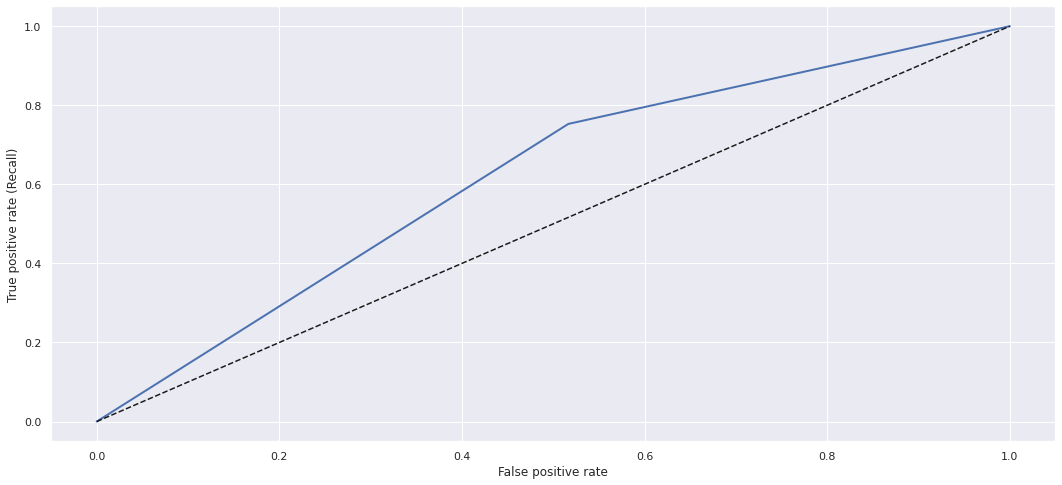

[[1084 1158]
 [ 110  335]]
              precision    recall  f1-score   support

         0.0       0.91      0.48      0.63      2242
         1.0       0.22      0.75      0.35       445

    accuracy                           0.53      2687
   macro avg       0.57      0.62      0.49      2687
weighted avg       0.79      0.53      0.58      2687

AUC: 0.6181529332758672
Misclassified samples: 1268


In [72]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

NB = GaussianNB()
NB.fit(X_train_b, y_train_b.values.ravel())

y_nb_pred = NB.predict(X_test)
count_misclassified_nb = (y_test.values.ravel() != y_nb_pred).sum()
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_nb_pred)

plot_roc_curve(fpr_nb, tpr_nb)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))
print("AUC:", roc_auc_score(y_test,y_nb_pred))
print('Misclassified samples: {}'.format(count_misclassified_nb))

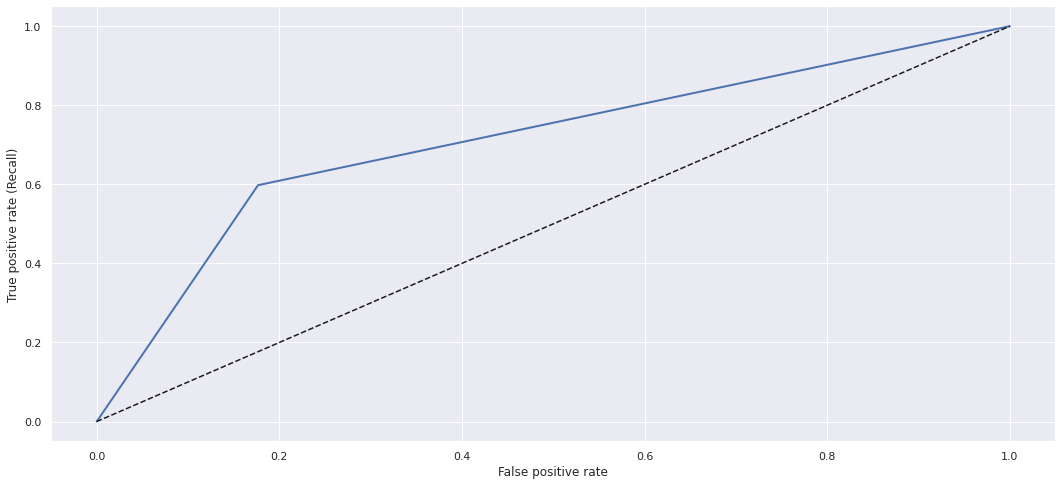

[[1846  396]
 [ 179  266]]
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.87      2242
         1.0       0.40      0.60      0.48       445

    accuracy                           0.79      2687
   macro avg       0.66      0.71      0.67      2687
weighted avg       0.83      0.79      0.80      2687

AUC: 0.710562399142018
Misclassified samples: 575


In [73]:
y_scores = cross_val_predict(NB, X_test, y_test.values.ravel(), cv=3)
fpr_nb2, tpr_nb2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_nb2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_nb2, tpr_nb2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_nb2))

### **2.** Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.


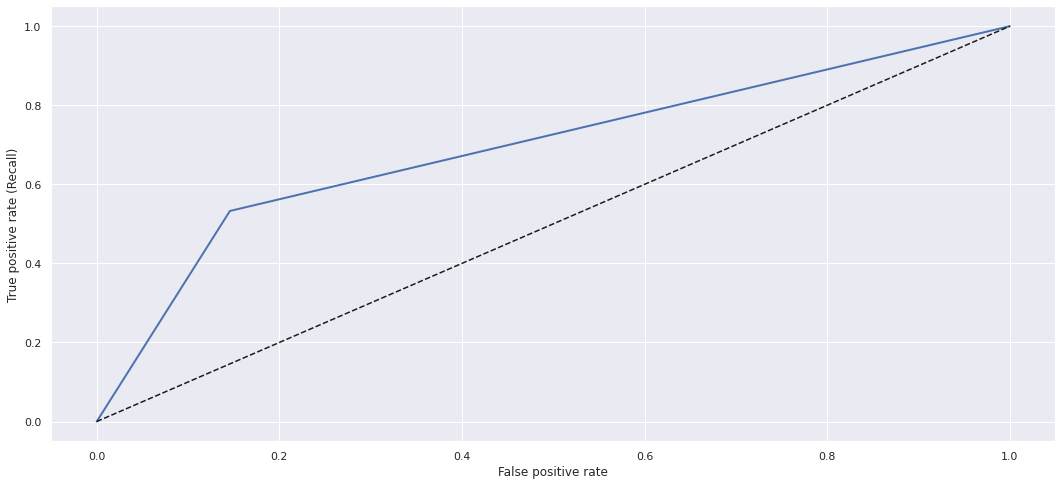

[[1915  327]
 [ 208  237]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      2242
         1.0       0.42      0.53      0.47       445

    accuracy                           0.80      2687
   macro avg       0.66      0.69      0.67      2687
weighted avg       0.82      0.80      0.81      2687

AUC: 0.6933661758662509
Misclassified samples: 535


In [74]:
cnb = CategoricalNB()
cnb.fit(X_train_b, y_train_b.values.ravel())

y_cnb_pred = cnb.predict(X_test)
count_misclassified_cnb = (y_test.values.ravel() != y_cnb_pred).sum()
fpr_cnb, tpr_cnb, thresholds = roc_curve(y_test, y_cnb_pred)

plot_roc_curve(fpr_cnb, tpr_cnb)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_cnb_pred))
print(classification_report(y_test, y_cnb_pred))
print("AUC:", roc_auc_score(y_test,y_cnb_pred))
print('Misclassified samples: {}'.format(count_misclassified_cnb))

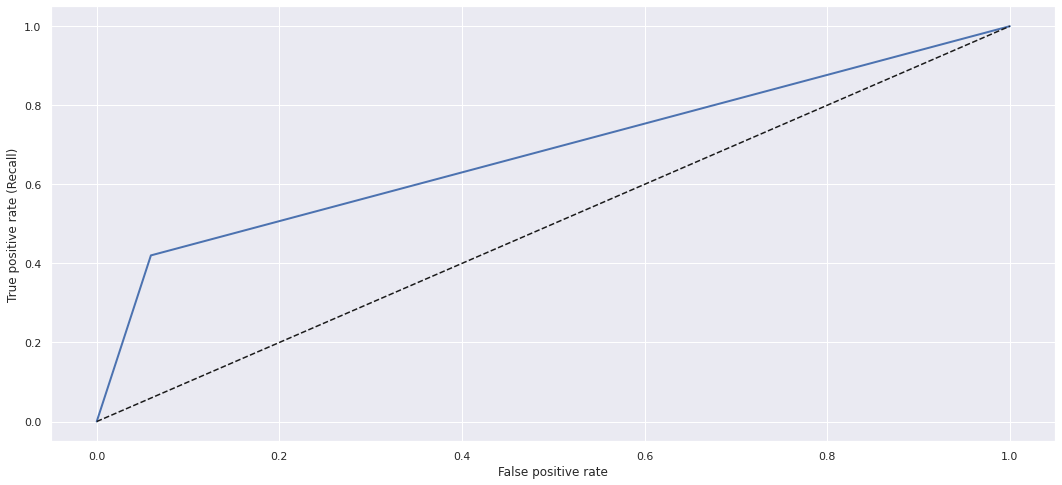

[[2109  133]
 [ 258  187]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      2242
         1.0       0.58      0.42      0.49       445

    accuracy                           0.85      2687
   macro avg       0.74      0.68      0.70      2687
weighted avg       0.84      0.85      0.84      2687

AUC: 0.6804513426014093
Misclassified samples: 391


In [75]:
y_scores = cross_val_predict(cnb, X_test, y_test.values.ravel(), cv=3)
fpr_cnb2, tpr_cnb2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_cnb2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_cnb2, tpr_cnb2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_cnb2))

## **8. Support Vector Machine**

### **1.** Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

In [76]:
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']} # create list of paraeters you would like to tune. We have already gone thorugh these parameters in our lecture and note

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

###### **executing time waas goin over 4hrs. Decided to use fewer paramters. This is what I have originally done:**

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']} # create list of paraeters you would like to tune. We have already gone thorugh these parameters in our lecture and note


Fitting 5 folds for each of 75 candidates, totalling 375 fits

[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   4.7s

[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   4.5s

[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.745 total time=   4.5s

[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.749 total time=   4.6s

[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   4.4s

[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.502 total time=   7.2s

[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.514 total time=   7.2s

[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.527 total time=   7.1s

[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.519 total time=   7.3s

[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.526 total time=   7.5s

[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.754 total time=   4.1s

[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.796 total time=   4.6s

[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.800 total time=   5.2s

[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.799 total time=   4.7s

[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.795 total time=   4.8s

[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   4.0s

[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   4.1s

[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   4.1s

[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   4.1s

[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   4.2s

[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.724 total time=   5.1s

[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.728 total time=   5.1s

[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.741 total time=   5.3s

[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.736 total time=   5.1s

[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.723 total time=   5.2s

[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.725 total time=   2.7s

[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.730 total time=   2.9s

[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.742 total time=   2.9s

[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.742 total time=   2.9s

[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.741 total time=   2.8s

[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.686 total time=   4.9s

[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.693 total time=   5.0s

[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.703 total time=   5.0s

[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.697 total time=   5.1s

[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.694 total time=   5.1s

[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.686 total time=   4.8s

[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.693 total time=   4.8s

[CV 3/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.703 total time=   4.8s

[CV 4/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.697 total time=   4.9s

[CV 5/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.694 total time=   4.8s

[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.664 total time=   4.2s

[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.662 total time=   4.2s

[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.685 total time=   4.3s

[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.692 total time=   6.2s

[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.695 total time=   6.4s

[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.706 total time=   6.2s

[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.703 total time=   6.2s

[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.697 total time=   6.3s

[CV 1/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.692 total time=   5.4s

[CV 2/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.695 total time=   5.5s

[CV 3/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.706 total time=   5.4s

[CV 4/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.703 total time=   5.4s

[CV 5/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.697 total time=   5.4s

[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.664 total time=   4.2s

[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.662 total time=   4.3s

[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.692 total time=   6.2s

[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.695 total time=   6.3s

[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.706 total time=   6.5s

[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.703 total time=   6.1s

[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.697 total time=   6.1s

[CV 1/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.692 total time=   5.
4s

[CV 2/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.695 total time=   5.
5s

[CV 3/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.706 total time=   5.
6s

[CV 4/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.703 total time=   5.
5s

[CV 5/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.697 total time=   5.
6s

[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.683 total time=   4.2s

[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.664 total time=   4.3s

[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.662 total time=   4.2s

[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.676 total time=   4.3s

[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.780 total time=   4.0s

[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.804 total time=   4.3s

[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.812 total time=   4.3s

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.810 total time=   4.2s

[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.793 total time=   4.4s

[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.609 total time=   4.6s

[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.598 total time=   4.9s

[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.584 total time=   4.9s

[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.634 total time=   4.7s

[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.604 total time=   5.0s

[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.764 total time=   9.5s

[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.811 total time=  12.2s

[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.810 total time=  12.1s

[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.813 total time=  11.1s

[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.808 total time=  12.2s

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.735 total time=   3.7s

[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.740 total time=   3.9s

[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.750 total time=   4.0s

[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   3.9s

[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.752 total time=   3.9s

[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.661 total time=   4.0s

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.656 total time=   4.0s

[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.653 total time=   4.1s

[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.660 total time=   4.2s

[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.659 total time=   4.3s

[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.731 total time=   2.6s

[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.736 total time=   2.7s

[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.742 total time=   2.8s

[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.745 total time=   2.7s

[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.750 total time=   2.9s

[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.717 total time=   4.2s

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.723 total time=   4.4s

[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.741 total time=   4.3s

[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.731 total time=   4.4s

[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.733 total time=   4.3s

[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.724 total time=   4.1s

[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.727 total time=   4.1s

[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.746 total time=   4.1s

[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.742 total time=   4.1s

[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.735 total time=   4.2s

[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.664 total time=   4.2s

[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.662 total time=   4.1s

[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.686 total time=   4.9s

[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.693 total time=   5.1s

[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.703 total time=   5.0s

[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.697 total time=   5.0s

[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.694 total time=   5.1s

[CV 1/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.686 total time=   4.7s

[CV 2/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.693 total time=   4.7s

[CV 3/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.703 total time=   4.7s

[CV 4/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.697 total time=   4.8s

[CV 5/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.694 total time=   4.8s

[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.664 total time=   4.1s

[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.662 total time=   4.1s

[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.692 total time=   6.0s

[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.695 total time=   6.3s

[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.706 total time=   6.2s

[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.703 total time=   6.2s

[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.697 total time=   6.3s

[CV 1/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.692 total time=   5.3s

[CV 2/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.695 total time=   5.5s

[CV 3/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.706 total time=   5.4s

[CV 4/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.703 total time=   5.4s

[CV 5/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.697 total time=   5.4s

[CV 1/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.664 total time=   4.2s

[CV 3/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.662 total time=   4.1s

[CV 4/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.807 total time=   3.8s

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.829 total time=   4.0s

[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.840 total time=   4.1s

[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.844 total time=   4.0s

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.824 total time=   4.0s

[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.629 total time=   2.8s

[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.629 total time=   2.8s

[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.630 total time=   2.8s

[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.641 total time=   2.9s

[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.637 total time=   2.8s

[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.758 total time=  50.6s

[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.821 total time= 1.4min

[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.827 total time= 1.4min

[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.828 total time= 1.4min

[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.820 total time= 1.2min

[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.740 total time=   3.9s

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.784 total time=   4.2s

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.788 total time=   4.4s

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.795 total time=   4.3s

[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.791 total time=   4.4s

[CV 1/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.623 total time=   3.6s

[CV 2/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.611 total time=   4.2s

[CV 3/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.658 total time=   3.0s

[CV 4/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.623 total time=   4.2s

[CV 5/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.612 total time=   4.1s

[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.748 total time=   3.2s

[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.768 total time=   3.2s

[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.775 total time=   3.3s

[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.781 total time=   3.2s

[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.774 total time=   3.3s

[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.721 total time=   4.1s

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.723 total time=   4.3s

[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.740 total time=   4.3s

[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.731 total time=   4.3s

[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.738 total time=   4.3s

[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.717 total time=   4.3s

[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.723 total time=   4.4s

[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.741 total time=   4.2s

[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.730 total time=   4.3s

[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.736 total time=   4.3s

[CV 1/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.710 total time=   3.4s

[CV 2/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.712 total time=   3.6s

[CV 3/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.708 total time=   3.5s

[CV 4/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.724 total time=   3.6s

[CV 5/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.717 total time=   3.7s

[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.717 total time=   4.5s

[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.724 total time=   4.6s

[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.740 total time=   4.5s

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.729 total time=   4.7s

[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.733 total time=   4.6s

[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.724 total time=   3.7s

[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.727 total time=   3.8s

[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.745 total time=   3.8s

[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.742 total time=   3.8s

[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.735 total time=   3.7s

[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.683 total time=   4.0s

[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.664 total time=   4.2s

[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.662 total time=   4.2s

[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.685 total time=   4.2s

[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.686 total time=   4.9s

[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.693 total time=   5.0s

[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.703 total time=   5.0s

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.697 total time=   5.0s

[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.694 total time=   4.9s

[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.686 total time=   5.0s

[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.693 total time=   4.8s

[CV 3/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.703 total time=   4.9s

[CV 4/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.697 total time=   4.8s

[CV 5/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.694 total time=   4.8s

[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.683 total time=   4.1s

[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.664 total time=   4.1s

[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.662 total time=   4.2s

[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.685 total time=   4.2s



[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   4.2s

[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.808 total time=   4.8s

[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.861 total time=   5.4s

[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.869 total time=   5.9s

[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.859 total time=   5.4s

[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.856 total time=   5.1s

[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.629 total time=   2.7s

[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.629 total time=   2.7s

[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.631 total time=   2.7s

[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.641 total time=   2.8s

[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.636 total time=   2.7s

[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.752 total time=11.3min

[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.818 total time=14.3min

[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.830 total time=13.7min

[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.834 total time=14.4min

[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.821 total time=15.5min

[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.749 total time=   4.4s

[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.803 total time=   5.2s

[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.802 total time=   5.2s

[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.809 total time=   5.1s

[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.803 total time=   5.1s

[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.617 total time=   3.1s

[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.633 total time=   3.1s

[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.623 total time=   3.6s

[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.632 total time=   2.9s

[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.606 total time=   3.2s

[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.754 total time=   3.7s

[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.796 total time=   4.6s

[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.800 total time=   4.3s

[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.799 total time=   4.2s

[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.795 total time=   4.6s

[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.734 total time=   4.3s

[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.744 total time=   4.6s

[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.760 total time=   4.7s

[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.750 total time=   4.6s

[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.761 total time=   4.6s

[CV 1/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.723 total time=   4.6s

[CV 2/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.724 total time=   5.2s

[CV 3/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.737 total time=   4.7s

[CV 4/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.730 total time=   4.9s

[CV 5/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.733 total time=   4.9s

[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.725 total time=   2.6s

[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.730 total time=   2.8s

[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.742 total time=   2.8s

[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.741 total time=   2.7s

[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.741 total time=   2.8s

[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.719 total time=   4.5s

[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.723 total time=   4.6s

[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.742 total time=   4.7s

[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.731 total time=   4.6s

[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.736 total time=   4.6s

[CV 1/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.717 total time=   3.5s

[CV 2/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.723 total time=   3.5s

[CV 3/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.741 total time=   3.6s

[CV 4/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.728 total time=   3.5s

[CV 5/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.734 total time=   3.5s

[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.683 total time=   3.9s

[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.664 total time=   4.0s

[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.662 total time=   4.0s

[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.685 total time=   4.0s

[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.676 total time=   4.0s

[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.717 total time=   4.1s

[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.724 total time=   4.2s

[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.740 total time=   4.2s

[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.729 total time=   4.2s

[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.733 total time=   4.2s

[CV 1/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.724 total time=   3.
6s

[CV 2/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.727 total time=   3.
6s

[CV 3/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.745 total time=   3.
6s

[CV 4/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.742 total time=   3.
6s

[CV 5/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.735 total time=   3.
6s

[CV 1/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.683 total time=   3.8s

[CV 2/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.664 total time=   4.0s

[CV 3/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.662 total time=   4.0s

[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.685 total time=   4.0s

[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.676 total time=   4.0s

[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.805 total time=  12.8s

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.881 total time=  16.2s

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.878 total time=  13.5s

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.867 total time=  13.0s

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.854 total time=  16.3s

[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.628 total time=   2.7s

[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.629 total time=   2.7s

[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.630 total time=   2.7s

[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.641 total time=   2.7s

[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.636 total time=   2.6s

[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.747 total time=65.7min


In [77]:
grid.fit(X_train_b, y_train_b.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.731 total time=   3.7s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time=   3.8s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.763 total time=   3.8s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.764 total time=   3.8s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.756 total time=   3.8s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.663 total time=   4.9s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.658 total time=   4.1s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   4.8s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.660 total time=   5.9s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.682 total time=   3.8s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.736 total time=   2.7s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

### **2.** test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.


In [87]:
svc = SVC()
final_model = svc.set_params(**grid.best_params_)
final_model.fit(X_train_b, y_train_b.values.ravel())
y_svc_pred = final_model.predict(X_test)

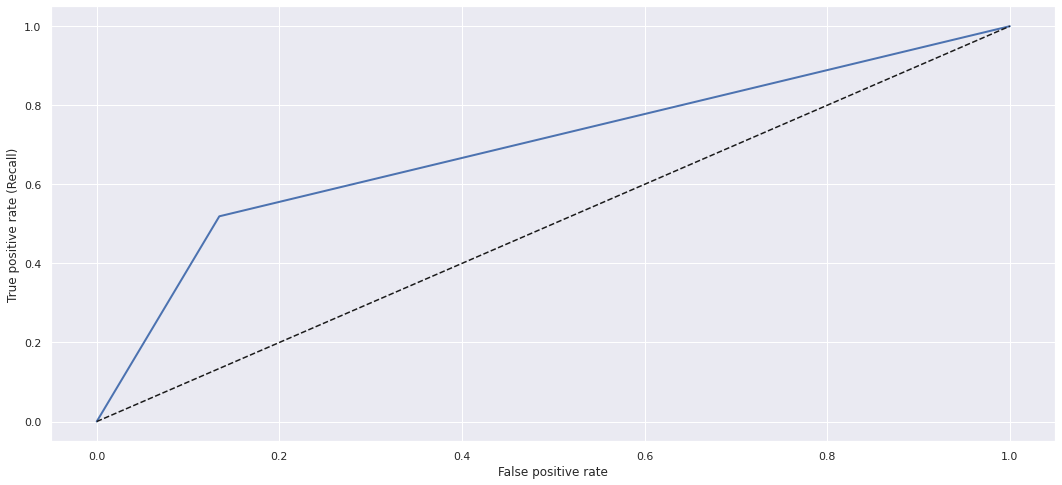

[[1941  301]
 [ 214  231]]
AUC: 0.692422997123355
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2242
         1.0       0.43      0.52      0.47       445

    accuracy                           0.81      2687
   macro avg       0.67      0.69      0.68      2687
weighted avg       0.82      0.81      0.81      2687

Misclassified samples: 515


In [90]:

count_misclassified_svc = (y_test.values.ravel() != y_svc_pred).sum()
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_svc_pred)

plot_roc_curve(fpr_svc, tpr_svc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, y_svc_pred))
print("AUC:", roc_auc_score(y_test,y_svc_pred))
print(classification_report(y_test, y_svc_pred))
print('Misclassified samples: {}'.format(count_misclassified_svc))

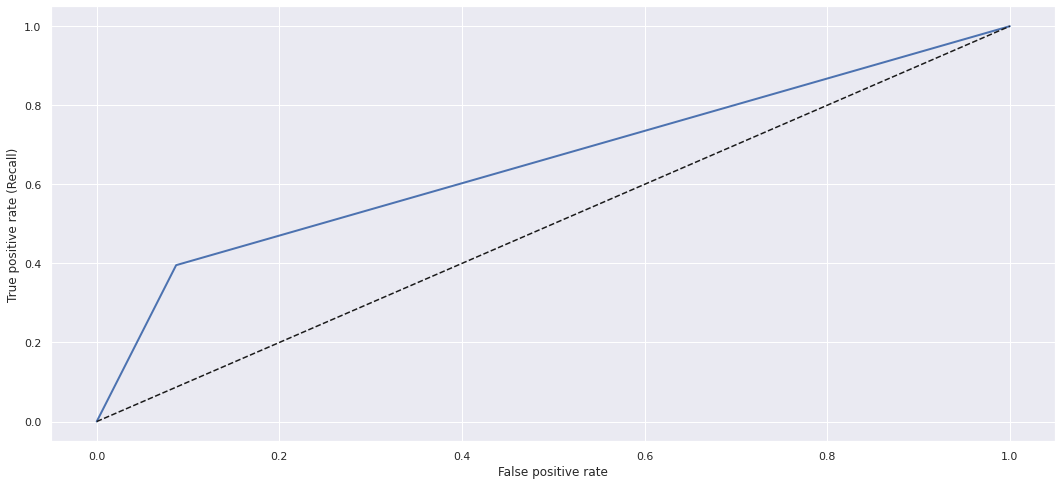

[[2047  195]
 [ 269  176]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      2242
         1.0       0.47      0.40      0.43       445

    accuracy                           0.83      2687
   macro avg       0.68      0.65      0.66      2687
weighted avg       0.82      0.83      0.82      2687

AUC: 0.6542648518076757
Misclassified samples: 464


In [91]:
y_scores = cross_val_predict(svc, X_test, y_test.values.ravel(), cv=3)
fpr_svc2, tpr_svc2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_svc2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_svc2, tpr_svc2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_svc2))

## **9. Decision Tree**

### **1.** Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize)

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
d_tree = DecisionTreeClassifier()

param = {
    "criterion":["entropy"],
    "max_depth":range(1,10),
}

gird_tree = GridSearchCV(d_tree,
                          param_grid = param,
                          verbose = 3)

In [111]:
gird_tree.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....criterion=entropy, max_depth=1;, score=0.847 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=1;, score=0.875 total time=   0.0s
[CV 3/5] END ....criterion=entropy, max_depth=1;, score=0.856 total time=   0.0s
[CV 4/5] END ....criterion=entropy, max_depth=1;, score=0.870 total time=   0.0s
[CV 5/5] END ....criterion=entropy, max_depth=1;, score=0.857 total time=   0.0s
[CV 1/5] END ....criterion=entropy, max_depth=2;, score=0.850 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=2;, score=0.875 total time=   0.0s
[CV 3/5] END ....criterion=entropy, max_depth=2;, score=0.857 total time=   0.0s
[CV 4/5] END ....criterion=entropy, max_depth=2;, score=0.870 total time=   0.0s
[CV 5/5] END ....criterion=entropy, max_depth=2;, score=0.859 total time=   0.0s
[CV 1/5] END ....criterion=entropy, max_depth=3;, score=0.852 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=3;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10)},
             verbose=3)

In [112]:
print(gird_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


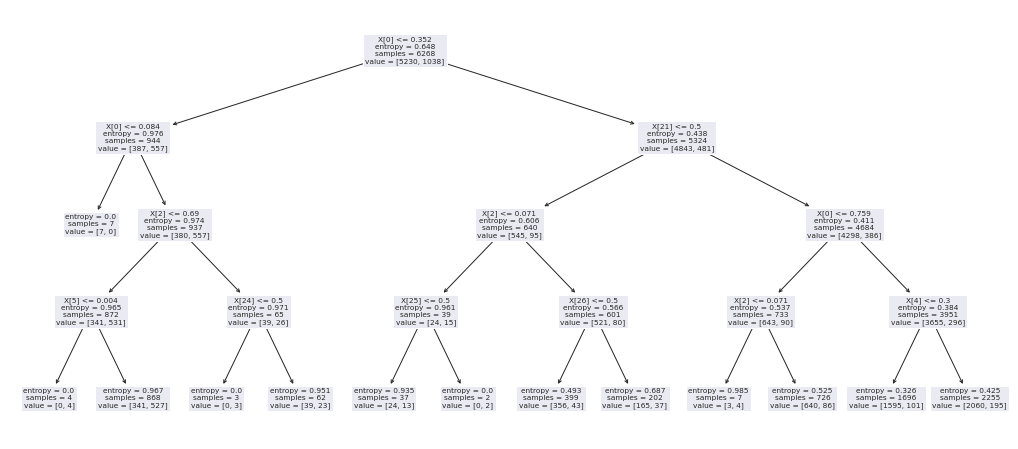

In [113]:
final_model = d_tree.set_params(**gird_tree.best_params_)
final_model.fit(X_train, y_train.values.ravel())
tree.plot_tree(final_model.fit(X_train, y_train.values.ravel()))

y_tree_pred = final_model.predict(X_test)

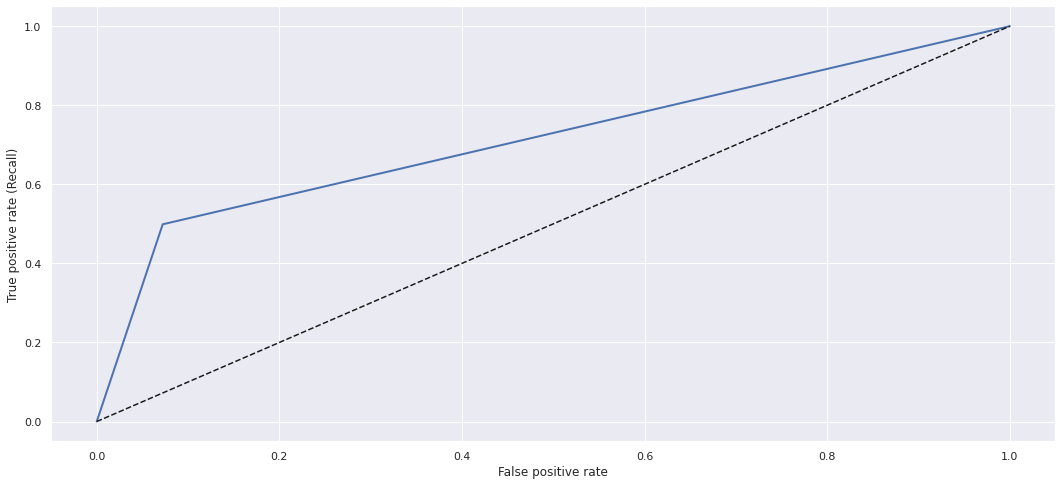

[[2080  162]
 [ 223  222]]
AUC: 0.7133097455121331
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.58      0.50      0.54       445

    accuracy                           0.86      2687
   macro avg       0.74      0.71      0.73      2687
weighted avg       0.85      0.86      0.85      2687

Misclassified samples: 385


In [114]:
count_misclassified_tree = (y_test.values.ravel() != y_tree_pred).sum()
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_tree_pred)

plot_roc_curve(fpr_tree, tpr_tree)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, y_tree_pred))
print("AUC:", roc_auc_score(y_test,y_tree_pred))
print(classification_report(y_test, y_tree_pred))
print('Misclassified samples: {}'.format(count_misclassified_tree))

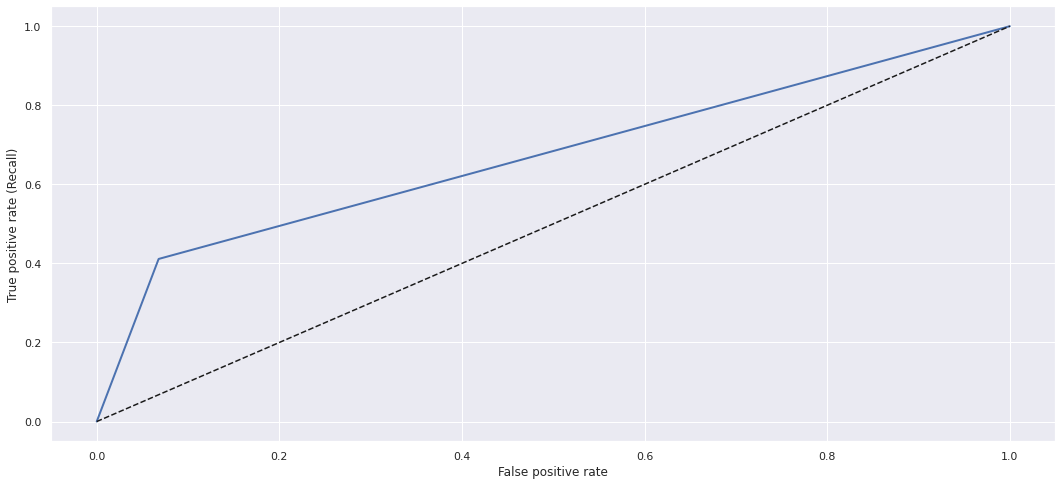

[[2090  152]
 [ 262  183]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      2242
         1.0       0.55      0.41      0.47       445

    accuracy                           0.85      2687
   macro avg       0.72      0.67      0.69      2687
weighted avg       0.83      0.85      0.84      2687

AUC: 0.6717196724433441
Misclassified samples: 414


In [99]:
y_scores = cross_val_predict(d_tree, X_test, y_test.values.ravel(), cv=3)
fpr_tree2, tpr_tree2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_tree2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_tree2, tpr_tree2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_tree2))

### **2.** Perform the same tasks as 9.1 with the balanced training set

In [101]:
d_tree_b = DecisionTreeClassifier()

param = {
    "criterion":["entropy"],
    "max_depth":range(1,10),
}

gird_tree_b = GridSearchCV(d_tree_b,
                          param_grid = param,
                          verbose = 3)

In [103]:
gird_tree_b.fit(X_train_b, y_train_b.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....criterion=entropy, max_depth=1;, score=0.726 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=1;, score=0.737 total time=   0.0s
[CV 3/5] END ....criterion=entropy, max_depth=1;, score=0.746 total time=   0.0s
[CV 4/5] END ....criterion=entropy, max_depth=1;, score=0.753 total time=   0.0s
[CV 5/5] END ....criterion=entropy, max_depth=1;, score=0.737 total time=   0.0s
[CV 1/5] END ....criterion=entropy, max_depth=2;, score=0.726 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=2;, score=0.737 total time=   0.0s
[CV 3/5] END ....criterion=entropy, max_depth=2;, score=0.746 total time=   0.0s
[CV 4/5] END ....criterion=entropy, max_depth=2;, score=0.753 total time=   0.0s
[CV 5/5] END ....criterion=entropy, max_depth=2;, score=0.737 total time=   0.0s
[CV 1/5] END ....criterion=entropy, max_depth=3;, score=0.722 total time=   0.0s
[CV 2/5] END ....criterion=entropy, max_depth=3;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10)},
             verbose=3)

In [104]:
print(gird_tree_b.best_params_)

{'criterion': 'entropy', 'max_depth': 9}


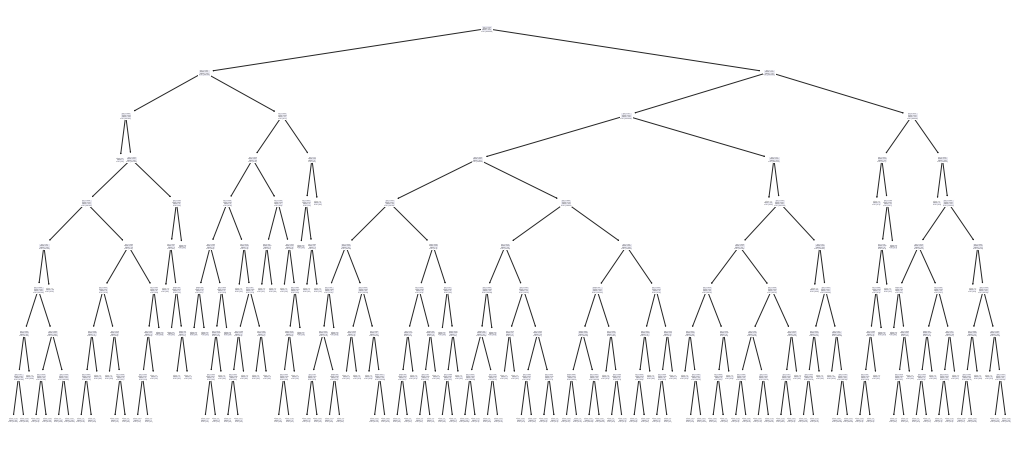

In [115]:
final_model = d_tree_b.set_params(**gird_tree_b.best_params_)
final_model.fit(X_train_b, y_train_b.values.ravel())
tree.plot_tree(final_model.fit(X_train_b, y_train_b.values.ravel()))

y_tree_pred_b = final_model.predict(X_test)

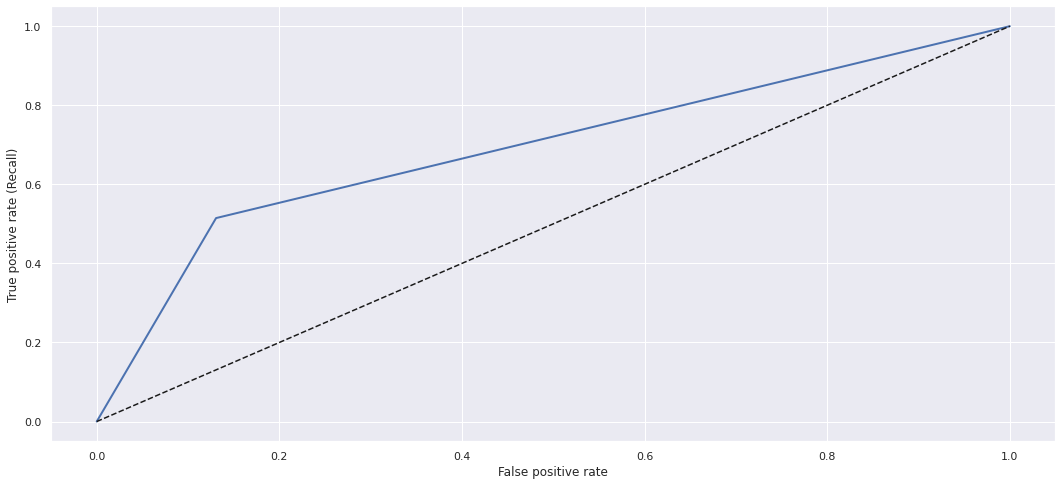

[[1949  293]
 [ 216  229]]
AUC: 0.6919599274323688
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2242
         1.0       0.44      0.51      0.47       445

    accuracy                           0.81      2687
   macro avg       0.67      0.69      0.68      2687
weighted avg       0.82      0.81      0.82      2687

Misclassified samples: 509


In [116]:
count_misclassified_tree_b = (y_test.values.ravel() != y_tree_pred_b).sum()
fpr_tree_b, tpr_tree_b, thresholds = roc_curve(y_test, y_tree_pred_b)

plot_roc_curve(fpr_tree_b, tpr_tree_b)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, y_tree_pred_b))
print("AUC:", roc_auc_score(y_test,y_tree_pred_b))
print(classification_report(y_test, y_tree_pred_b))
print('Misclassified samples: {}'.format(count_misclassified_tree_b))

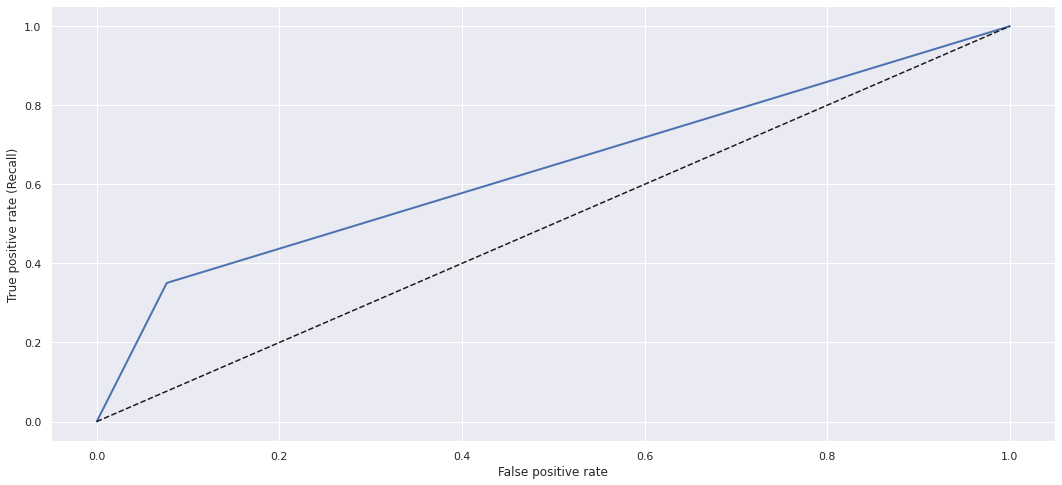

[[2070  172]
 [ 289  156]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      2242
         1.0       0.48      0.35      0.40       445

    accuracy                           0.83      2687
   macro avg       0.68      0.64      0.65      2687
weighted avg       0.81      0.83      0.82      2687

AUC: 0.6369222904910343
Misclassified samples: 461


In [117]:
y_scores = cross_val_predict(d_tree_b, X_test, y_test.values.ravel(), cv=3)
fpr_tree_b2, tpr_tree_b2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_tree_b2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_tree_b2, tpr_tree_b2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_tree_b2))

### **3.** Discuss any difference and also discuss part of the tree of 9.2

##### **Discussion:** By going through the search grid and by plotting the figure of the three is obvious that the one with the balance data has a larger max_depth. The one using the unbalance data seems to have a slightly better AUC and the other classification reports.

## **10. Random Forest**

### **1.** Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (helpful link:https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) [it may take about 5 minutes]

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [140]:
grid_search.fit(X_train_b, y_train_b.values.ravel())

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

### **2.** Print the best estimator

In [141]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


### **3.** train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [142]:
from sklearn.tree import plot_tree
final_model = rf.set_params(**grid_search.best_params_)
final_model.fit(X_train_b, y_train_b.values.ravel())
#plot_tree(grid_search.best_estimator_)

y_rf_pred_ = final_model.predict(X_test)

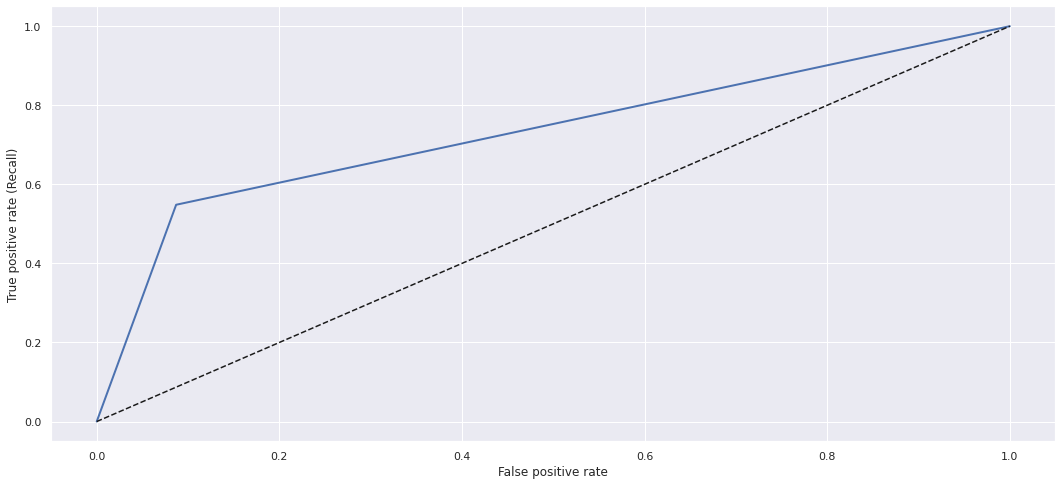

[[2047  195]
 [ 201  244]]
AUC: 0.7306693461896981
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2242
         1.0       0.56      0.55      0.55       445

    accuracy                           0.85      2687
   macro avg       0.73      0.73      0.73      2687
weighted avg       0.85      0.85      0.85      2687

Misclassified samples: 396


In [143]:
count_misclassified_rf = (y_test.values.ravel() != y_rf_pred_).sum()
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rf_pred_)

plot_roc_curve(fpr_rf, tpr_rf)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, y_rf_pred_))
print("AUC:", roc_auc_score(y_test,y_rf_pred_))
print(classification_report(y_test, y_rf_pred_))
print('Misclassified samples: {}'.format(count_misclassified_rf))

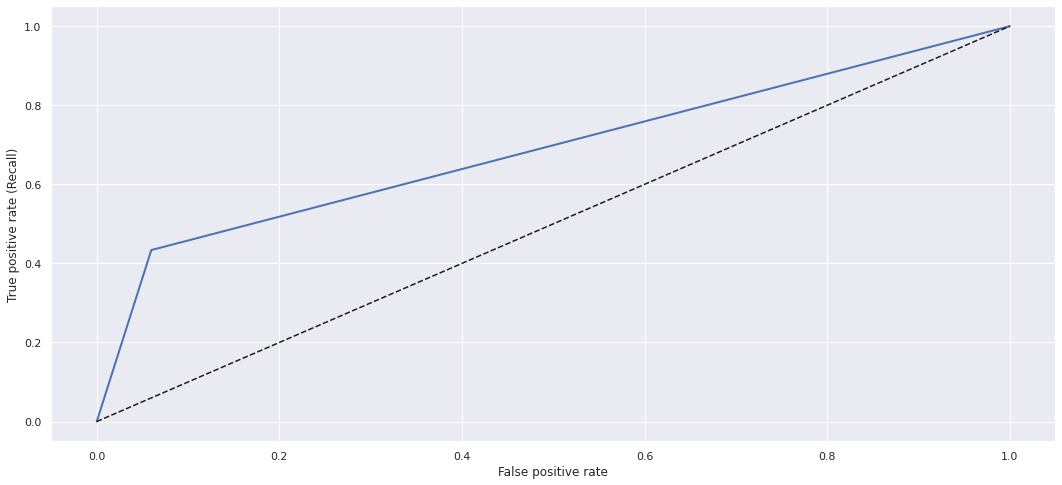

[[2108  134]
 [ 252  193]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      2242
         1.0       0.59      0.43      0.50       445

    accuracy                           0.86      2687
   macro avg       0.74      0.69      0.71      2687
weighted avg       0.84      0.86      0.85      2687

AUC: 0.6869699004700859
Misclassified samples: 386


In [148]:
y_scores = cross_val_predict(rf, X_test, y_test.values.ravel(), cv=3)
fpr_rf2, tpr_rf2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_rf2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_rf2, tpr_rf2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_rf2))

## **11. Boosting Algorithms**

### **1.** Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [179]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=20, random_state = 0)

ada.fit(X_train_b, y_train_b.values.ravel())
ada_predict = ada.predict(X_test)

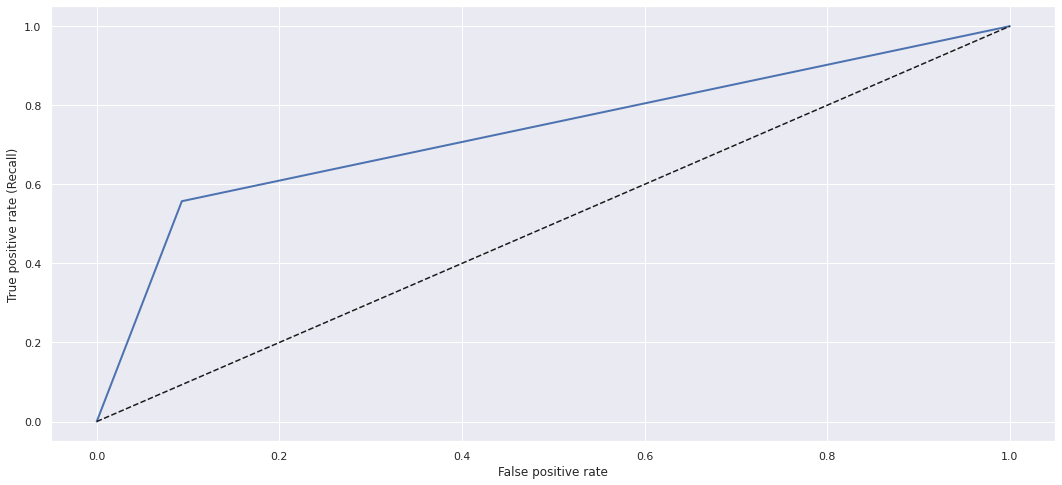

[[2033  209]
 [ 197  248]]
AUC: 0.732041515901733
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2242
         1.0       0.54      0.56      0.55       445

    accuracy                           0.85      2687
   macro avg       0.73      0.73      0.73      2687
weighted avg       0.85      0.85      0.85      2687

Misclassified samples: 406


In [180]:
count_misclassified_ada = (y_test.values.ravel() != ada_predict).sum()
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, ada_predict)

plot_roc_curve(fpr_ada, tpr_ada)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, ada_predict))
print("AUC:", roc_auc_score(y_test,ada_predict))
print(classification_report(y_test, ada_predict))
print('Misclassified samples: {}'.format(count_misclassified_ada))

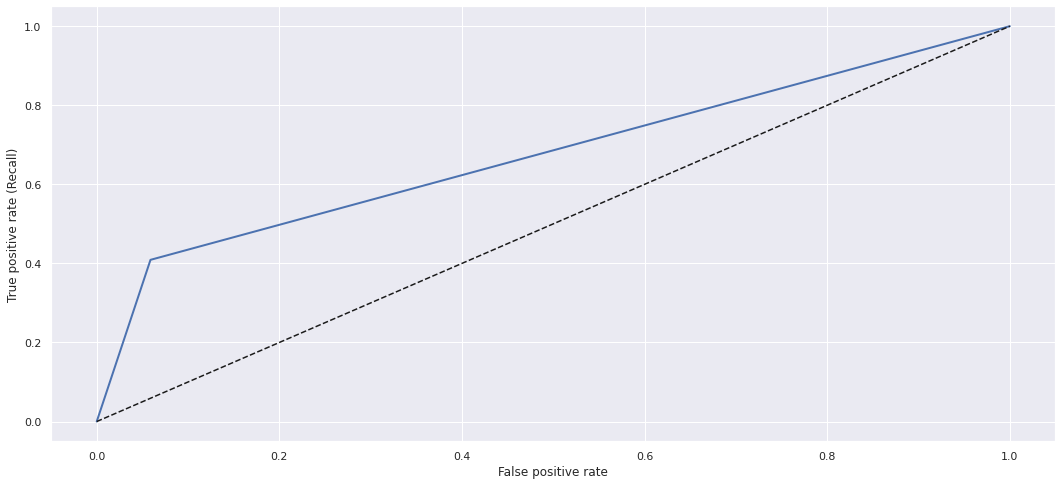

[[2110  132]
 [ 263  182]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2242
         1.0       0.58      0.41      0.48       445

    accuracy                           0.85      2687
   macro avg       0.73      0.68      0.70      2687
weighted avg       0.84      0.85      0.84      2687

AUC: 0.6750563802383507
Misclassified samples: 395


In [181]:
y_scores = cross_val_predict(ada, X_test, y_test.values.ravel(), cv=3)
fpr_ada2, tpr_ada2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_ada2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_ada2, tpr_ada2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_ada2))

### **2.** Do the same for Gradient BoostingClassifier
Helpful links: 
https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/#:~:text=Types%20of%20Boosting%20Algorithms&text=AdaBoost%20(Adaptive%20Boosting),XGBoost  (Links to an external site.) 
Another link: https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/  (Links to an external site.) 

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
gb =GradientBoostingClassifier(n_estimators=20, learning_rate =0.01, max_features=2, max_depth = 2, random_state= 0)

gb.fit(X_train_b, y_train_b.values.ravel())

y_gb_predic = gb.predict(X_test)

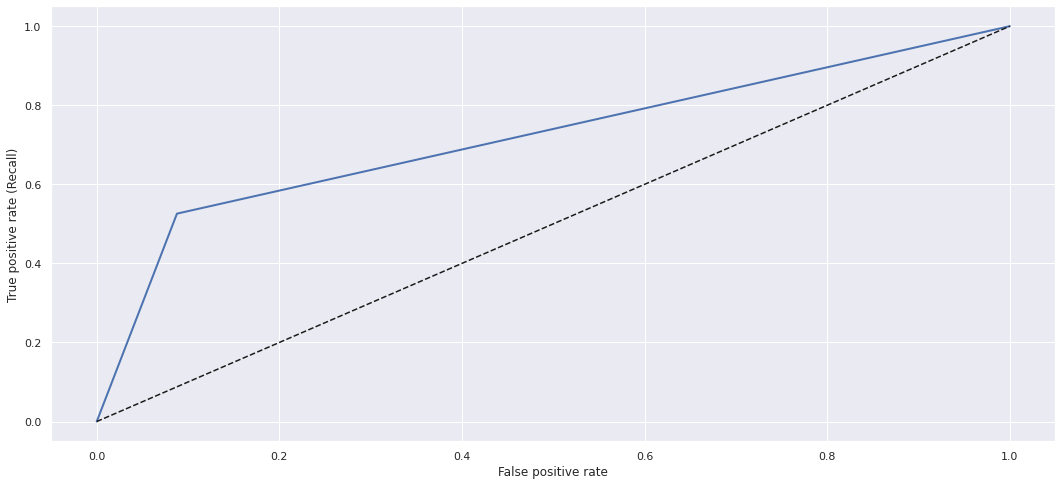

[[2045  197]
 [ 211  234]]
AUC: 0.7189873608034559
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2242
         1.0       0.54      0.53      0.53       445

    accuracy                           0.85      2687
   macro avg       0.72      0.72      0.72      2687
weighted avg       0.85      0.85      0.85      2687

Misclassified samples: 408


In [188]:
count_misclassified_gb = (y_test.values.ravel() != y_gb_predic).sum()
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_gb_predic)

plot_roc_curve(fpr_gb, tpr_gb)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

print(confusion_matrix(y_test, y_gb_predic))
print("AUC:", roc_auc_score(y_test,y_gb_predic))
print(classification_report(y_test, y_gb_predic))
print('Misclassified samples: {}'.format(count_misclassified_gb))

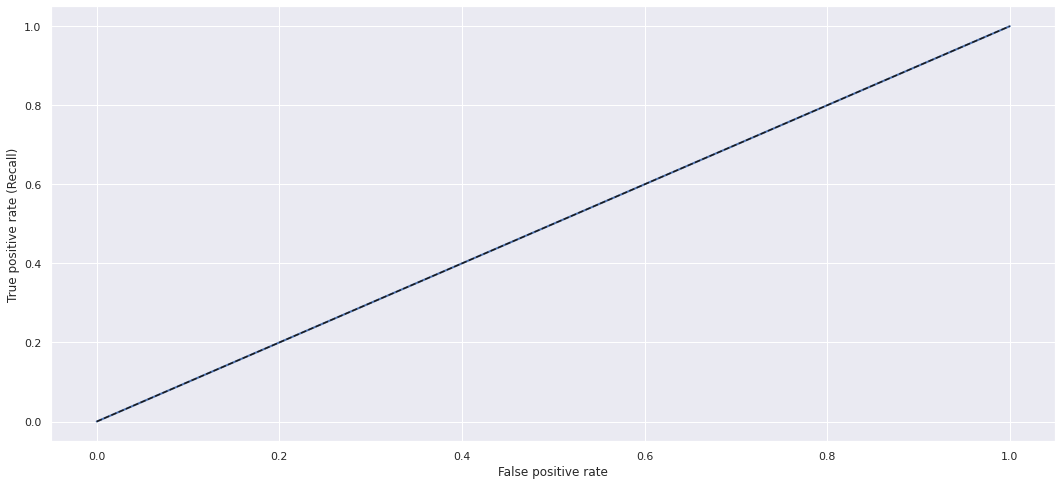

[[2242    0]
 [ 445    0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2242
         1.0       0.00      0.00      0.00       445

    accuracy                           0.83      2687
   macro avg       0.42      0.50      0.45      2687
weighted avg       0.70      0.83      0.76      2687

AUC: 0.5
Misclassified samples: 445


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
y_scores = cross_val_predict(gb, X_test, y_test.values.ravel(), cv=3)
fpr_gb2, tpr_gb2, thresholds = roc_curve(y_test, y_scores)

count_misclassified_gb2 = (y_test.values.ravel() != y_scores).sum()

plot_roc_curve(fpr_gb2, tpr_gb2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()
print(confusion_matrix(y_test, y_scores))
print(classification_report(y_test, y_scores))
print("AUC:", roc_auc_score(y_test,y_scores))
print('Misclassified samples: {}'.format(count_misclassified_gb2))

## 12. Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.


For this specifict scenario choosing Ada, Decision Tree, Random forest will be the must optimal including logistic. 

SVM performs good but due to computational timing and cost I was not able to fully apply it. Otherwise, I would be a good choice too.

KNN peforms good but in this scenario I would go by NB since KNN takes more time due to interpolation. 

My future work will be applying and finding better parameters that would suit the models, specially for models like Ada, GradientBoosting, SVM, KNN, and Decision Tree.